In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('Social_Network_Ads.csv')
X = ds.iloc[:, [2,3]].values
Y = ds.iloc[:, 4].values

In [5]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [23]:
Y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

In [25]:
print (cm)

[[61  7]
 [ 5 27]]


In [26]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12,10

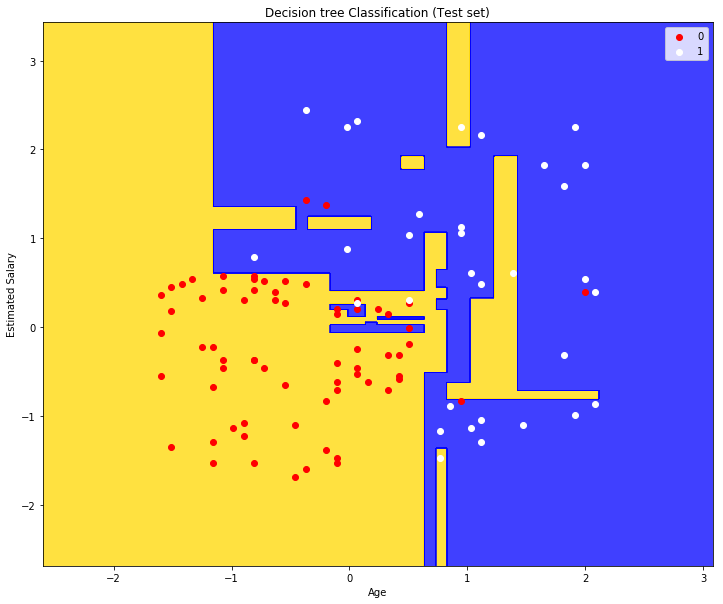

In [27]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_age_range = np.arange(start = X_test[:, 0].min() - 1,
                               stop = X_test[:, 0].max() + 1, step = 0.01)
x_salary_range = np.arange(start = X_test[:, 1].min() - 1,
                               stop = X_test[:, 1].max() + 1, step = 0.01)

X1, X2 = np.meshgrid(X_age_range,x_salary_range)

X_plot = np.array([X1.ravel(), X2.ravel()]).T

plt.contourf(X1, X2, classifier.predict(X_plot).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('gold', 'blue')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    choose_rows = (Y_test == j)
    plt.scatter(X_test[choose_rows, 0], X_test[choose_rows, 1],
                c = ListedColormap(('red', 'white'))(i), label = j)
plt.title('Decision tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()